# The VGG-16 model was developed by the Visual Graphics Group (VGG)

### By default, the VGG-16 model expects color input images to be rescaled to the size of 224x224 squares 

In [2]:
from keras.applications.vgg16 import VGG16
# Load Model
model=VGG16()

553467904/553467096 [==============================] - 64s 0us/step


In [3]:
# Summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import utils

In [12]:
# Load on image from folder
train_folder = '/Users/zhanjing/MLGroupProjectData/train'
test_folder = '/Users/zhanjing/MLGroupProjectData/test'
validate_folder = '/Users/zhanjing/MLGroupProjectData/valid'

normal_folder = '/normal'
adenocarcinoma_folder = '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
large_cell_carcinoma_folder = '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
squamous_cell_carcinoma_folder = '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'

In [13]:
from glob import glob
from PIL import Image

def plot_images(imgs, rows=5):
    # Set figure to 15 inches x 8 inches
    figure = plt.figure(figsize=(25, 12))
    cols = len(imgs) // rows + 1
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        plt.imshow(imgs[i])

def plot_images_for_filenames(filenames, rows=5):
    imgs = [plt.imread(f'{filename}') for filename in filenames]
    return plot_images(imgs, rows)

['/Users/zhanjing/MLGroupProjectData/train/normal/17.png', '/Users/zhanjing/MLGroupProjectData/train/normal/16.png', '/Users/zhanjing/MLGroupProjectData/train/normal/12.png', '/Users/zhanjing/MLGroupProjectData/train/normal/13.png', '/Users/zhanjing/MLGroupProjectData/train/normal/11.png', '/Users/zhanjing/MLGroupProjectData/train/normal/10.png', '/Users/zhanjing/MLGroupProjectData/train/normal/18.png', '/Users/zhanjing/MLGroupProjectData/train/normal/19.png']
Images of Normal lungs


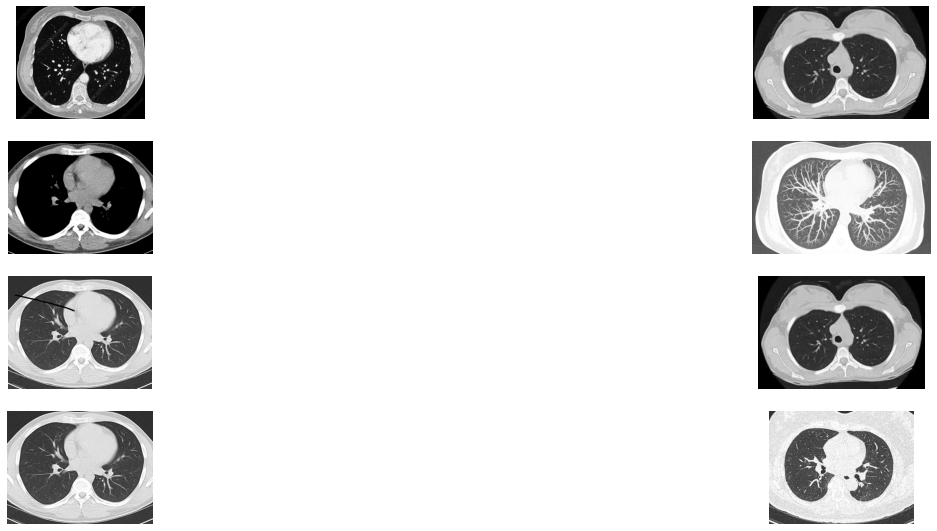

In [14]:
sample_images = glob(train_folder + normal_folder + '/1?.png')
print (sample_images)
print ("Images of Normal lungs")
plot_images_for_filenames(sample_images)   

['/Users/zhanjing/MLGroupProjectData/train/normal/17.png']
Images of Normal lungs


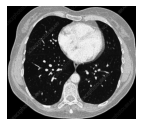

In [16]:
sample_images = glob(train_folder + normal_folder + '/17.png')
print (sample_images)
print ("Images of Normal lungs")
plot_images_for_filenames(sample_images) 

In [29]:
image=tf.keras.preprocessing.image.load_img(
    "/Users/zhanjing/MLGroupProjectData/train/normal/17.png",
    grayscale=True,
    target_size=(224,224),
    interpolation='nearest'
)

In [30]:
# Convert the image pixels to a numpy array
image=np.array(image)

In [38]:
image.shape[0]

1

In [39]:
image.shape[1]

224

In [40]:
image.shape[2]

224

In [41]:
# Reshape data for the model
image=image.reshape((image.shape[0],image.shape[1],image.shape[2]))

In [42]:
# Prepare the image for the VGG model
image=preprocess_input(image)
image

array([[[-207.878, -233.558, -247.36 , ..., -123.68 , -116.779,
         -103.939],
        [-207.878, -233.558, -247.36 , ..., -123.68 , -116.779,
         -103.939],
        [-207.878, -233.558, -247.36 , ..., -123.68 , -116.779,
         -103.939],
        ...,
        [-207.878, -233.558, -247.36 , ..., -123.68 , -116.779,
         -103.939],
        [-207.878, -233.558, -247.36 , ..., -123.68 , -116.779,
         -103.939],
        [-207.878, -233.558, -247.36 , ..., -123.68 , -116.779,
         -103.939]]], dtype=float32)

In [43]:
# Predict the probability across all output classes
yhat=model.predict(image)

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (1, 224, 224)

In [51]:
from tensorflow.keras.preprocessing.image import load_img

In [52]:
Tiffany_dance=load_img('IMG_5591.JPG',target_size=(224,224))

In [53]:
TD=np.array(Tiffany_dance)

In [56]:
TD

array([[[183, 170, 138],
        [183, 169, 140],
        [181, 167, 138],
        ...,
        [112,  77,  37],
        [107,  72,  32],
        [115,  81,  36]],

       [[183, 169, 140],
        [181, 167, 138],
        [182, 168, 139],
        ...,
        [ 91,  58,  17],
        [ 99,  66,  23],
        [111,  78,  37]],

       [[181, 167, 138],
        [180, 166, 137],
        [181, 167, 138],
        ...,
        [108,  73,  33],
        [ 97,  64,  21],
        [ 92,  59,  14]],

       ...,

       [[225, 192, 149],
        [148, 111,  82],
        [215, 154, 125],
        ...,
        [107,  94,  88],
        [137, 124, 118],
        [139, 126, 120]],

       [[224, 187, 134],
        [177, 138, 107],
        [220, 166, 132],
        ...,
        [138, 123, 118],
        [127, 114, 108],
        [146, 133, 127]],

       [[225, 195, 141],
        [187, 153, 108],
        [239, 189, 162],
        ...,
        [145, 132, 126],
        [143, 128, 123],
        [152, 139, 133]]

In [57]:
TD=image.reshape((TD.shape[0],TD.shape[1],TD.shape[2]))

ValueError: cannot reshape array of size 50176 into shape (224,224,3)